# Distribution of PPS 

I here demonstrate the distribution of psychosis-proneness scores across the two samples in more detail. 

Psychosis-proneness measures were the 
- Peters et al. Delusions Inventory (PDI)
- Cardiff Anomalous Perceptions Scale (CAPS)



In [1]:
import os, glob, sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# get data related to psychosis proneness scores
os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\Data\\Exp1_auditory\\psychosis_raw\\')
pdi = pd.read_csv('pdi_privateIDs.csv')
caps = pd.read_csv('caps_privateIDs.csv')
# merge both together
pps = caps.merge(pdi, on='Subject_ID', suffixes=('_caps','_pdi'))
print(len(caps),len(pdi))

142 144


In [3]:
# get experimental data to get only included ppl
os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\Data\\Exp1_auditory')
df_exp1 = pd.read_csv('exp1_model1_auditory.csv')

sbj_exp1 = list(df_exp1['sbj_id'].unique())
print('Experiment 1 included: ',len(sbj_exp1))

os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\Data\\Exp2_visual')
df_exp2 = pd.read_csv('exp2_model1_visual.csv')

sbj_exp2 = list(df_exp2['sbj_id'].unique())

# drop rows if not in list of included subjects
pdi = pdi[pdi['Subject_ID'].isin(sbj_exp1)]
caps = caps[caps['Subject_ID'].isin(sbj_exp1)]
pps = pps[pps['Subject_ID'].isin(sbj_exp1)]

print('Exp1 PDI included: ',len(pdi))
print('Exp1 CAPS included: ',len(caps))

Experiment 1 included:  113
Exp1 PDI included:  113
Exp1 CAPS included:  113


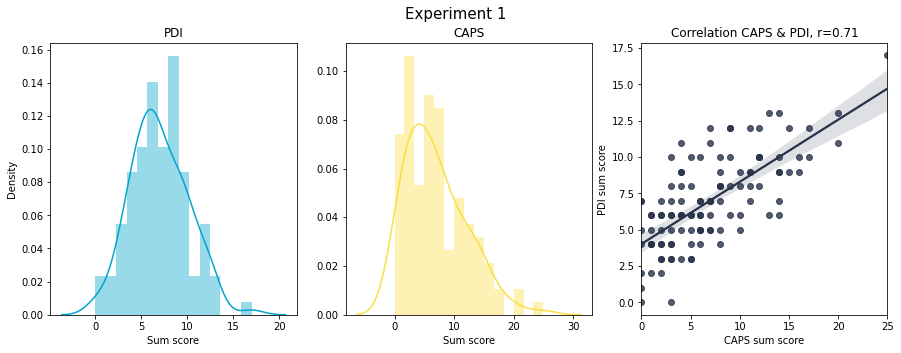

In [4]:
corr = np.corrcoef(pps['sum score_caps'], pps['sum score_pdi'])
corr_pps = round(corr[0][1],2)

fig, axs = plt.subplots(1,3, figsize=[15,5])

plt.suptitle('Experiment 1', fontsize=15)

_=axs[0].set_title('PDI')
_=axs[0].set_ylabel('Density')
sns.distplot(pdi['sum score'],bins=15,ax=axs[0],color='#00A4CCFF')
_=axs[0].set_xlabel('Sum score')

_=axs[1].set_title('CAPS')
sns.distplot(caps['sum score'],bins=15,ax=axs[1],color='#FBDE44FF')
_=axs[1].set_xlabel('Sum score')

_=axs[2].set_title('Correlation CAPS & PDI, r=%.2f'%(corr_pps))
sns.regplot(x='sum score_caps', y='sum score_pdi', data=pps, color='#28334AFF')
axs[2].set_xlabel('CAPS sum score')
axs[2].set_ylabel('PDI sum score')

os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\revision_SB1')
fig.savefig('exp1_pps.svg')

In [5]:
os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\Data\\Exp2_visual\\psychosis_raw\\')
pdi_files = glob.glob('*_pdi.csv')
caps_files = glob.glob('*_caps.csv')

def return_sum_score(df): 
    sum_score = df[df['Q']=='Global']['global'].values[0]
    return sum_score

pdi2 = pd.DataFrame(columns=['ID', 'pdi_sum'])
caps2= pd.DataFrame(columns=['ID', 'caps_sum'])

for file in pdi_files:
    sbj_id = file.split('_')[0]
    df = pd.read_csv(file, header=None)
    df.columns = ['Q', 'global', 'distress', 'freq', 'convict']
    pdi_sum = return_sum_score(df)
    case = {'ID':sbj_id, 'pdi_sum':pdi_sum}
    pdi2 = pdi2.append(case,ignore_index=True)
    
for file in caps_files:
    df = pd.read_csv(file, header=None)
    sbj_id = file.split('_')[0]
    df.columns = ['Q','global','distress','distract','freq']
    caps_sum = return_sum_score(df)
    case = {'ID':sbj_id, 'caps_sum':caps_sum}
    caps2 = caps2.append(case,ignore_index=True)

print('Experiment 2 included: ',len(sbj_exp2))
pps2 = caps2.merge(pdi2, on='ID', suffixes=('_caps','_pdi'))
print('All PPS data: ',len(pps2))

# drop excluded participants
pdi2 = pdi2[pdi2['ID'].isin(sbj_exp2)]
caps2 = caps2[caps2['ID'].isin(sbj_exp2)]
pps2 = pps2[pps2['ID'].isin(sbj_exp2)]
print('Included PPS data: ',len(pps2))

<ipython-input-5-cc12498441d7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdi2 = pdi2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdi2 = pdi2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdi2 = pdi2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdi2 = pdi2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

<ipython-input-5-cc12498441d7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdi2 = pdi2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdi2 = pdi2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caps2 = caps2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caps2 = caps2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Experiment 2 included:  41
All PPS data:  46
Included PPS data:  41


<ipython-input-5-cc12498441d7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caps2 = caps2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caps2 = caps2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caps2 = caps2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caps2 = caps2.append(case,ignore_index=True)
<ipython-input-5-cc12498441d7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

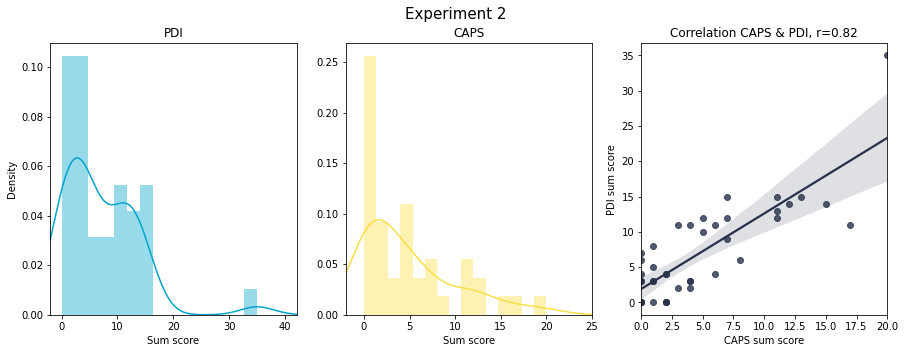

In [6]:
fig, axs = plt.subplots(1,3, figsize=[15,5])

plt.suptitle('Experiment 2', fontsize=15)

#PDI
axs[0].set_title('PDI')
sns.distplot(pdi2['pdi_sum'],bins=15,ax=axs[0],color='#00A4CCFF')
axs[0].set_xlabel('Sum score')
axs[0].set_ylabel('Density')
axs[0].set_xlim(-2,42)

#CAPS
axs[1].set_title('CAPS')
sns.distplot(caps2['caps_sum'],bins=15,ax=axs[1],color='#FBDE44FF')
axs[1].set_xlabel('Sum score')
axs[1].set_xlim(-2,25)

# Correlational
pps2['caps_sum'] = pps2['caps_sum'].astype(int)
pps2['pdi_sum'] = pps2['pdi_sum'].astype(int)
corr = np.corrcoef(pps2['caps_sum'], pps2['pdi_sum'])
corr_pps = round(corr[0][1],2)

axs[2].set_title('Correlation CAPS & PDI, r=%.2f'%corr_pps)
sns.regplot(x='caps_sum', y='pdi_sum', data=pps2, color='#28334AFF')
axs[2].set_xlabel('CAPS sum score')
axs[2].set_ylabel('PDI sum score')

os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\revision_SB1')
fig.savefig('exp2_pps.svg')

# Exp. 2 - is this an outlier? 

In [12]:
Q1 = pps2['pdi_sum'].quantile(0.25)
Q3 = pps2['pdi_sum'].quantile(0.75)
IQR = Q3-Q1

In [15]:
pps2[pps2['pdi_sum'] > (Q3 + 1.5*IQR)]

,ID,caps_sum,pdi_sum
39,YII30J,20,35


## Correct for Outlier in Exp. 2

In [15]:
outlier = 'YII30J'
pps2[pps2['ID']==outlier]

pps2.drop(pps2[pps2['ID']==outlier].index, inplace=True)
pdi2.drop(pdi2[pdi2['ID']==outlier].index, inplace=True)
caps2.drop(caps2[caps2['ID']==outlier].index, inplace=True)

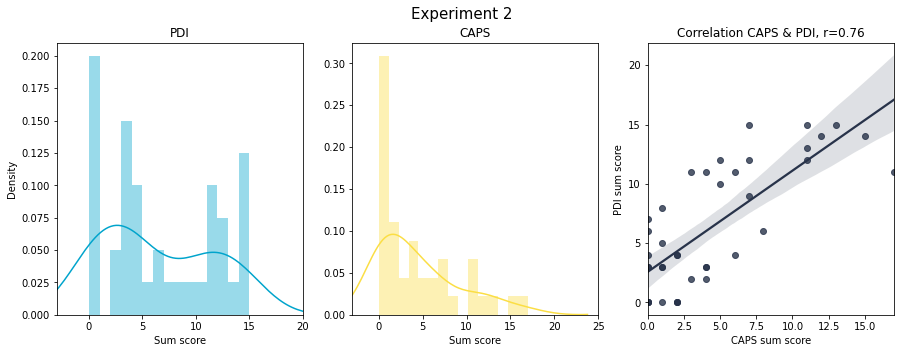

In [10]:
fig, axs = plt.subplots(1,3, figsize=[15,5])

plt.suptitle('Experiment 2', fontsize=15)

#PDI
axs[0].set_title('PDI')
sns.distplot(pdi2['pdi_sum'],bins=15,ax=axs[0],color='#00A4CCFF')
axs[0].set_xlabel('Sum score')
axs[0].set_ylabel('Density')
axs[0].set_xlim(-3,20)

#CAPS
axs[1].set_title('CAPS')
sns.distplot(caps2['caps_sum'],bins=15,ax=axs[1],color='#FBDE44FF')
axs[1].set_xlabel('Sum score')
axs[1].set_xlim(-3,25)

# Correlational
pps2['caps_sum'] = pps2['caps_sum'].astype(int)
pps2['pdi_sum'] = pps2['pdi_sum'].astype(int)
corr = np.corrcoef(pps2['caps_sum'], pps2['pdi_sum'])
corr_pps = round(corr[0][1],2)

axs[2].set_title('Correlation CAPS & PDI, r=%.2f'%corr_pps)
sns.regplot(x='caps_sum', y='pdi_sum', data=pps2, color='#28334AFF')
axs[2].set_xlabel('CAPS sum score')
axs[2].set_ylabel('PDI sum score')

os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\revision_SB1')
fig.savefig('exp2_noOutlier_pps.svg')

In [27]:
df_noOutlier = df_exp2.drop(df_exp2[df_exp2['sbj_id']==outlier].index)
assert df_exp2.shape[0] - df_noOutlier.shape[0] == 760
df_noOutlier.to_csv('exp2_visual_noOutlier.csv')